# Asymptotics of Localized Solutions of the One-Dimensional Wave Equation with Variable Velocity

#### Equestions
$\begin{cases} 
    \mu^2u_{tt}(x, t) + \mu^2\frac{\partial}{\partial x} c(x) \frac{\partial}{\partial x} u(x, t) = 0\\
    u_{t=0} = V(\frac{x}{\mu} - \frac{a}{\mu}) \\
    u_{t, t=0} = 0
\end{cases}$

#### Characteristics
$\begin{cases}
    \dot{x} = \pm c(x) \\
    x_{t=0} = a
\end{cases}$

#### Theorem
$
\textbf{1. }
    u(x, t) = \frac{1}{2}\Sigma_{\pm}{\sqrt{\frac{c_0}{c(X^{\pm}(t))}}
        V(\frac{c_0 \cdot (x-X^{\pm}(t)}{c(X^{\pm}(t))\cdot\mu}} + O(\mu|log\mu|)
$

$
\textbf{2. }
    u(x,t) = \frac{1}{2}\Sigma_{\pm}\sqrt{\frac{c_0}{c(x)}} 
    V(\frac{c_0(T^{\pm}(x)\mp t)}{\mu}) + O(\mu|log\mu|)
$

$    T^{\pm}(X(t, a)) = \pm\int\limits_a^{X^{\pm}(t, a)}\frac{dx}{c(x)}$

## Формула 1
$
\textbf{1. }
    u(x, t) = \frac{1}{2}\Sigma_{\pm}{\sqrt{\frac{c_0}{c(X^{\pm}(t))}}
        V(\frac{c_0 \cdot (x-X^{\pm}(t)}{c(X^{\pm}(t))\cdot\mu}} + O(\mu|log\mu|)
$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Solution

def H(x):
    q =np.sqrt(1+8*np.exp(x))
    return (2*q/(1+q))**2
    
def c(x):
    return np.sqrt(H(x))


def V(y):
  return 3*np.exp(-y**2)


def X(sgn, t):
  if np.abs(sgn) != 1:
      raise Exception("|sgn| != 1")
  global a
  q = np.sqrt(1+8*np.exp(a)) - 1
  et = np.exp(sgn*t)
  X = lambda et: np.log(et*q*(2+et*q)/8)
  #print(X(1))
  return X(et)


def u1(x, t):
  global a
  c_0=c(a)
  global mu
  sgn = [-1, 1]
  U = 0
  for sgn in sgn:
    U += np.sqrt(c_0/c(X(sgn, t))) * V(c_0*(x-X(sgn, t))/(c(X(sgn, t))*mu))/2
  return U
  #plt.show()

# Невязка
def DU_analitic(x, t):
    global XX, TT, mu, c_0, X
    dt = np.max(np.diff(TT))
    sgn = [-1, 1]
    DU = 0
    y = lambda s: c_0*(x-X(s, t))/(c(X(s, t))*mu)
    V1 = lambda s: V(y(s))
    dV1 = lambda s: -2*y(s)*V1(s)
    A = lambda s: np.sqrt(c_0/c(X(s, t)))
    u = lambda s: A(s) * V1(s)/2
    
    for sg in sgn:
        T = np.array([t, t + dt, t+2*dt])
        C = c(X(sg, T))
        #print(X(sg, T))
        h = (X(sg, T[1]) - X(sg, T[0]))
        dC = ((C[1] - C[0]))/(2*h)
        d2C = (C[2] - 2*C[1] + C[0])/(2*h**2)
        DU += (mu**2/2)*(1/4 * dC**2 * u(sg) - 0.5*d2C*A(sg)*V1(sg) - 2*c_0/mu*A(sg)*dV1(sg)*d2C*(x-X(sg, t)))       
    return DU

def DU_num_t(t):
    dt = np.mean(np.diff(TT))
    dx = np.mean(np.diff(XX))
    u1 = u1(XX, t+dt)
    u0 = u1(XX, t)
    u_1 = u1(XX, t-dt)
    U_tt = (u1(XX, t+dt)-2*u1(XX, t)+u1(XX, t-dt))/(dt**2)
    u_x = (u0[2:]-u0[:-2])/(2*dx)
    c2u_x = c(XX)[1:-1]*c(XX)[1:-1]*u_x
    c2u_x_x = (c2u_x[2:]-c2u_x[:-2])/(2*dt)
    DU = U_tt[2:-2]-c2u_x_x
    return DU
#plt.plot(XX[:-2], DU_num_t(-5))

def draw1(t, axs):
  global XX, TT
  axs[0].plot(XX, u1(XX, t), label=f"u1(x, {t})")   
  axs[1].plot(TT, u1(a+t, TT), label=f"u1(a+{t}, t)")
  #axs[0].plot(XX, DU_analitic(XX, t), label=f"u_analit(x, {t})")
  #axs[0].plot(XX[2:-2], DU_num_t(t), label=f"u_num(x, {t})")

def main():
    global XX, TT, a, c_0, mu
    fig1, (ax, ay) = plt.subplots(1, 2, figsize=(20, 6))
    fig2, axs = plt.subplots(1, 2, figsize = (20, 6))
    fig1.suptitle("u(x, t)")
    ax.plot(XX, -H(XX), color="black", label=r"$H(x)$")
    ax.grid(True)
    ax.set_xlabel("X")
    ax.set_ylim([-4, 4])
    ay.set_xlabel("t")
    
    fig2.suptitle("Невязка")
    axs[0].set_xlabel("x")
    axs[1].set_xlabel("x")
    axs[0].set_title(r"$\delta u(x, t)_{analit}$", size="large")
    axs[1].set_title(r"$\delta u(x, t)_{num}$", size="large")

## Формула 2
$
\textbf{2. }
    u(x,t) = \frac{1}{2}\Sigma_{\pm}\sqrt{\frac{c_0}{c(x)}} 
    V(\frac{c_0(\pm\tau(x) - t)}{\mu}) + O(\mu|log\mu|)
$

$    T^{\pm}(X(t, a)) = \pm\int\limits_a^{X^{\pm}(t, a)}\frac{dx}{c(x)}$

In [2]:
def T(sgn, x):
    global a
    q = lambda x: np.sqrt(8*np.exp(x) + 1)
    tau = lambda x: sgn * np.log((q(x)-1)/(q(a)-1))
    return tau(x)

def u2(x, t):
    global a, mu, c_0
    y = lambda s: c_0*(T(s, x) -t)/mu
    V1 = lambda s: V(y(s))
    A = np.sqrt(c_0/c(x))
    sgn = [-1,1]
    U = 0
    for s in sgn:
        U += A*V1(s)/2
    return U
    
def draw2(t, axs):
  global XX, TT
  axs[0].plot(XX, u2(XX, t), label=f"u2(x, {t})")   
  axs[1].plot(TT, u2(a+t, TT), label=f"u2(a+{t}, t)")



## Сравнение схем

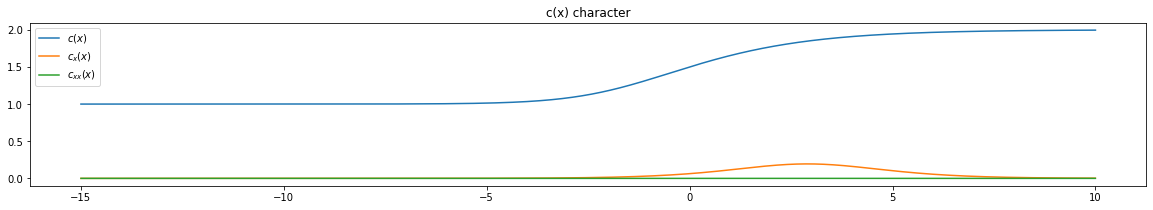

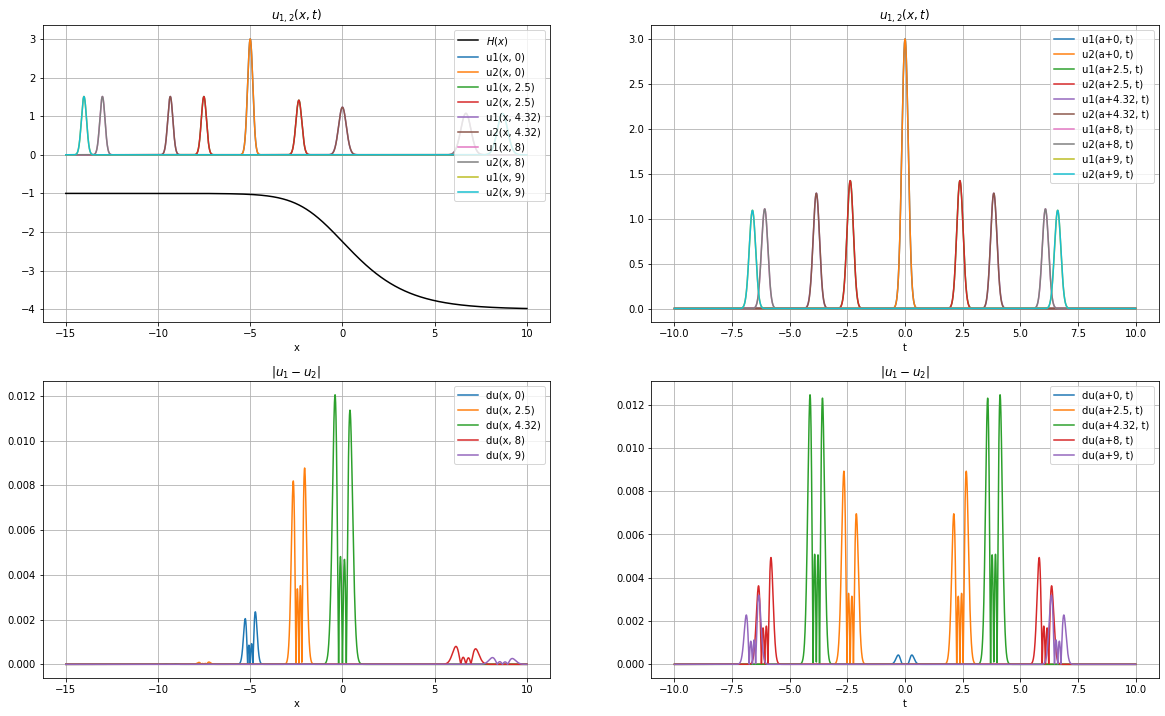

In [9]:
du = lambda x, t: abs(u1(x, t) - u2(x, t))

def draw(t, axs, ays):
    global XX, TT
    axs[0].plot(XX, du(XX, t), label=f"du(x, {t})")   
    axs[1].plot(TT, du(a+t, TT), label=f"du(a+{t}, t)")
    draw1(t, ays); draw2(t, ays)
def main():
    global a, mu, XX, TT
    dc = np.diff(c(X(1, TT)))
    dx = np.mean(np.diff(X(1, TT)))
    c_x = dc/dx
    ddc = np.diff(dc)
    c_xx = ddc/dx
    plt.figure(figsize=(20, 3))
    plt.title(r"c(x) character")
    plt.plot(XX, c(XX), label=r"$c(x)$")
    plt.plot(XX[0:len(XX)-1], c_x, label = r"$c_x(x)$")
    plt.plot(XX[1:len(XX)-1], c_xx, label = r"$c_{xx}(x)$")
    plt.legend()
    plt.show()

    fig, axs = plt.subplots(2, 2, figsize=(20, 12))
    axs[0,0].set_title(r"$u_{1,2}(x,t)$"); axs[0, 1].set_title(r"$u_{1,2}(x,t)$")
    axs[0,0].set_xlabel("x"); axs[0, 1].set_xlabel("t");
    axs[1, 0].set_title(r"$|u_1 - u_2|$");  axs[1, 1].set_title(r"$|u_1 - u_2|$");
    axs[1,0].set_xlabel("x"); axs[1, 1].set_xlabel("t");    
    axs[0][0].plot(XX, -H(XX), color="black", label=r"$H(x)$")
    
    T1 = [0, 2.5, 4.32, 8, 9]
    for t in T1:
        draw(t, axs[1], axs[0])

    for AXS in axs:
        for ax in AXS:
            ax.legend() 
            ax.grid(True)
    
if __name__ == "__main__":
    a = -5
    mu = 0.2
    c_0 = c(a)
    XX=np.linspace(-15, 10, 10000)
    TT=np.linspace(-10, 10, 10000)
    main()

In [ ]:
def DU_num_t(t):
    dt = np.mean(np.diff(TT))
    dx = np.mean(np.diff(XX))
    u1 = u(XX, t+dt)
    u0 = u(XX, t)
    u_1 = u(XX, t-dt)
    U_tt = (u(XX, t+dt)-2*u(XX, t)+u(XX, t-dt))/(dt**2)
    u_x = (u0[2:]-u0[:-2])/(2*dx)
    c2u_x = c(XX)[1:-1]*c(XX)[1:-1]*u_x
    c2u_x_x = (c2u_x[2:]-c2u_x[:-2])/(2*dt)
    DU = (U_tt[2:-2],c2u_x_x)
    return DU
DU = DU_num_t(-5)
plt.plot(XX[2:-2], DU[0])
plt.plot(XX[2:-2], DU[1])
plt.show()
plt.plot(XX[2:-2], DU[0]-DU[1])
plt.show()
def DU_num_x(x):
    dt = np.mean(np.diff(TT))
    dx = np.mean(np.diff(XX))
    u1 = u(x+dx, TT)
    u0 = u(x, TT)
    u_1 = u(x-dx, TT)
    u_t = (np.diff(u0))/dt
    u_tt = (np.diff(u_t))/dt
    #U_tt = (u(x+dx, TT)-2*u(x, TT)+u(x-dx, TT))/(dx**2)

    u1_x = (u1-u0)/dx
    u0_x = (u0 - u1)/dx
    c2u1_x = c(x)*c(x)*u1_x
    c2u0_x = c(x)**2*u0_x
    c2u_x_x = (c2u1_x-c2u0_x)/dx
    DU = c2u_x_x[1:-1] - U_tt
    return DU

#plt.plot(TT[1:-1], DU_num_x(-5))

In [ ]:
mu

In [ ]:
a